# Descriptive Statistics for Patients Dataset
This script can be run only on the Patients dataset. It create visualizations that would not apply to the other datasets.

_Author: Jared Gauntt_

## Prepare for Analysis

### Set Parameters

In [1]:
localFolder='../data/01_raw/' #If run from Git Hub project folder structure, script must be in "notebooks" folder
fileName='20210214-ems-raw-v03.xlsx'
sheetName='Patients'
removeDuplicates=True

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Import from Excel Spreadsheet

In [3]:
#Import single tab 
df=pd.read_excel(localFolder+fileName,sheet_name=sheetName)

<ipython-input-3-a47a1f5be443>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df=pd.read_excel(localFolder+fileName,sheet_name=sheetName)


### Remove Duplicate Rows

In [4]:
if removeDuplicates:
    #Determine which rows are duplicates (True=duplicate, False=first instance of row)
    duplicateRowIdentifier=df.duplicated()

    #Reduce to the rows that were not flagged as duplicates
    df=df.loc[duplicateRowIdentifier==False,:]
    print('Removing Duplicate Rows')
    
else:
    print('Duplicate Rows NOT Removed')

Removing Duplicate Rows


## Functions

### Confirm Assumption and Reduce to Unique Rows

In [19]:
def ReduceToOneRowPerID(df,colID,colAnalyze):

    #Count the number of unique IDs
    numUniqueIDs=df[colID].nunique(dropna=False)

    #Count the number of unique rows
    numUniqueRows=len(df.index[df[[colID,colAnalyze]].duplicated()==False])

    #Confirm assumption that each ID has only one value associated with it
    additionalValues=numUniqueRows-numUniqueIDs
    if not additionalValues==0:
        print('WARNING: ['+colID+','+colAnalyze+'] has '+str(additionalValues)+' more unique row(s) than unique ['+colID+']')

    #Reduce dataset to unique rows
    dfAnalyze=df.loc[df.index[df[[colID,colAnalyze]].duplicated()==False],[colID,colAnalyze]]
    
    return(dfAnalyze)

### Pie Chart

In [80]:
def PieChart(df,colID,colAnalyze):

    #Confirm assumption and reduce to unique rows
    dfAnalyze=ReduceToOneRowPerID(df,colID,colAnalyze)
    
    #Count number of instances of each value
    dsCount=dfAnalyze[colAnalyze].value_counts(dropna=False).sort_index()

    #Generate pie chart
    fig,ax=plt.subplots()
    ax.pie(x=dsCount,labels=dsCount.index,autopct='%1.1f%%')
    ax.set_title(colAnalyze)
    plt.show()

### Histogram

In [90]:
def Histogram(df,colID,colAnalyze):

    #Confirm assumption and reduce to unique rows
    dfAnalyze=ReduceToOneRowPerID(df,colID,colAnalyze)

    #Generate pie chart
    fig,ax=plt.subplots()
    ax.hist(dfAnalyze[colAnalyze],bins=20)
    ax.set_title(colAnalyze)
    ax.set_ylabel('Number of IDs')
    plt.show()

## Visualizations

### Shift

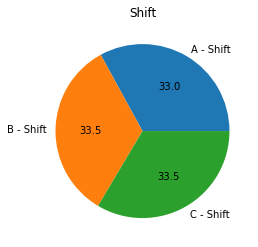

In [67]:
PieChart(df,'PatientId','Shift')

### Unit ID

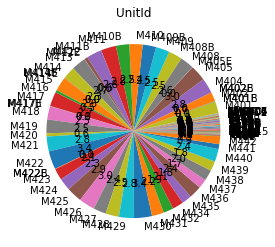

In [68]:
PieChart(df,'PatientId','UnitId')

### Fire Station

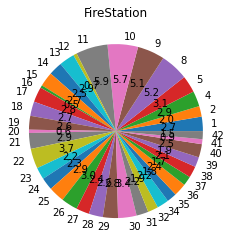

In [69]:
PieChart(df,'PatientId','FireStation')

### Battalion

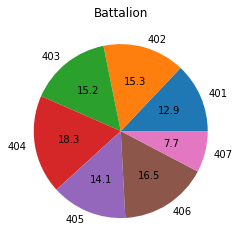

In [70]:
PieChart(df,'PatientId','Battalion')

### Dispatch Time

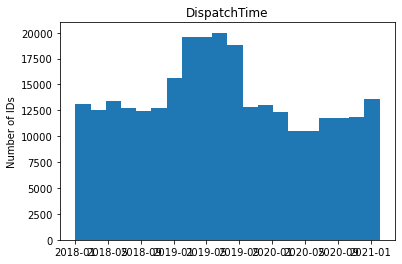

In [91]:
Histogram(df,'PatientId','DispatchTime')

### Patient Outcome

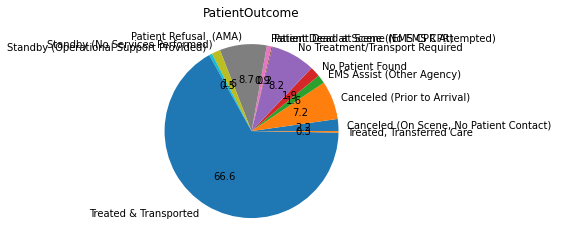

In [72]:
PieChart(df,'PatientId','PatientOutcome')

### Patient Gender

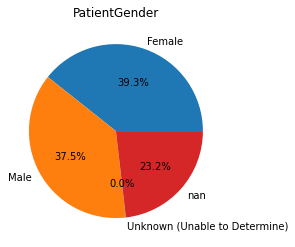

In [82]:
PieChart(df,'PatientId','PatientGender')

### FRD Personnel Gender

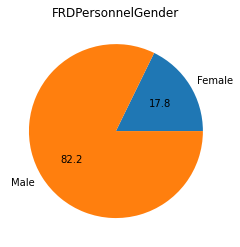

In [74]:
PieChart(df,'FRDPersonnelID','FRDPersonnelGender')

### FRD Personnel Start Date

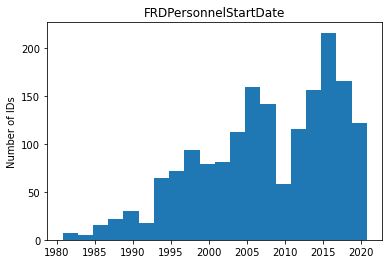

In [92]:
Histogram(df,'FRDPersonnelID','FRDPersonnelStartDate')